In [1]:
!git clone https://github.com/openvinotoolkit/anomalib.git


Cloning into 'anomalib'...
remote: Enumerating objects: 12680, done.
remote: Counting objects: 100% (142/142), done.
remote: Compressing objects: 100% (129/129), done.
remote: Total 12680 (delta 37), reused 17 (delta 11), pack-reused 12538 (from 2)
Receiving objects: 100% (12680/12680), 62.29 MiB | 27.49 MiB/s, done.
Resolving deltas: 100% (7183/7183), done.


In [1]:
%cd anomalib
!pip install .
!anomalib install -v

/content/anomalib
Processing /content/anomalib
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for anomalib: filename=anomalib-2.1.0.dev0-py3-none-any.whl size=668092 sha256=544167ebc017fac0a49a03a3fdd2dfcdd31cd06f1de10168efa1ca501cc97679
  Stored in directory: /tmp/pip-ephem-wheel-cache-15o58xqf/wheels/dd/be/5a/9004ee2f27a576aa170101704f600deb85d5165561867d3be1
Successfully built anomalib
  Attempting uninstall: anomalib
    Found existing installation: anomalib 2.1.0.dev0
    Uninstalling anomalib-2.1.0.dev0:
      Successfully uninstalled anomalib-2.1.0.dev0
To use other subcommand using `anomalib install`
To use comet logger install it using `pip install comet-ml`
To use any logger install it using `anomalib install -v`
/usr/local/lib/python3.11/dist-packages/_distutils_hack/__init__.py:31: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported d

In [2]:


import os
from pathlib import Path

from git.repo import Repo

from typing import Any

import torch
import torchvision
import pandas as pd

import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from torchvision.transforms import ToPILImage

from anomalib import TaskType
from anomalib.data import MVTec
from anomalib.data.utils import read_image
from anomalib.deploy import ExportType, OpenVINOInferencer
from anomalib.engine import Engine
from anomalib.models import EfficientAd

datamodule = MVTec(num_workers=0)
datamodule.prepare_data()
datamodule.setup()

i, data = next(enumerate(datamodule.val_dataloader()))
data_dict = data.__dict__
print(data_dict.keys())

model = EfficientAd()





<frozen importlib.util>:262: DeprecationWarning: The `openvino.runtime` module is deprecated and will be removed in the 2026.0 release. Please replace `openvino.runtime` with `openvino`.
/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
<ipython-input-2-c55bb73be94a>:24: DeprecationWarning: MVTec is deprecated and will be removed in a future version. Please use MVTecAD instead.
  datamodule = MVTec(num_workers=0)
mvtecad: 5.26GB [04:11, 21.0MB/s]                            


dict_keys(['image', 'gt_label', 'gt_mask', 'mask_path', 'anomaly_map', 'pred_score', 'pred_mask', 'pred_label', 'explanation', 'image_path'])


In [ ]:
datamodule = MVTec(category="grid", train_batch_size=1, eval_batch_size=16, num_workers=0)

engine = Engine()
engine.fit(model=model, datamodule=datamodule)

<ipython-input-3-9d4dc3f33f60>:1: DeprecationWarning: MVTec is deprecated and will be removed in a future version. Please use MVTecAD instead.
  datamodule = MVTec(category="grid", train_batch_size=1, eval_batch_size=16, num_workers=0)
INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/loops/utilities.py:73: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name           | Type             | Params | Mode 
------------------------------------------------------------
0 | pre_processor  | PreProcessor     | 0      | train
1 | post_processor | Post

Training: |          | 0/? [00:00<?, ?it/s]


efficientad_pretrained_weights.zip: 0.00B [00:00, ?B/s]
efficientad_pretrained_weights.zip:   0%|          | 8.19k/40.0M [00:00<44:57, 14.8kB/s]
efficientad_pretrained_weights.zip:  21%|██▏       | 8.55M/40.0M [00:00<00:01, 16.9MB/s]
efficientad_pretrained_weights.zip:  36%|███▌      | 14.3M/40.0M [00:00<00:00, 25.8MB/s]
efficientad_pretrained_weights.zip:  47%|████▋     | 18.9M/40.0M [00:00<00:00, 30.6MB/s]
efficientad_pretrained_weights.zip:  63%|██████▎   | 25.2M/40.0M [00:01<00:00, 30.0MB/s]
efficientad_pretrained_weights.zip:  63%|██████▎   | 25.2M/40.0M [00:01<00:00, 19.9MB/s]
efficientad_pretrained_weights.zip:  79%|███████▊  | 31.5M/40.0M [00:01<00:00, 27.1MB/s]
efficientad_pretrained_weights.zip: 40.0MB [00:01, 26.1MB/s]                            
/usr/local/lib/python3.11/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.T

Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:02<00:00,  1.69it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:02<00:00,  1.69it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.67it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.67it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:02<00:00,  1.69it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.67it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.67it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.50it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.67it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.67it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.50it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.50it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


Validation: |          | 0/? [00:00<?, ?it/s]

Calculate Validation Dataset Quantiles: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


In [ ]:

from anomalib.models import Patchcore

In [ ]:
model = Patchcore()

datamodule = MVTec(category="grid", train_batch_size=32, eval_batch_size=16, num_workers=0)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/276M [00:00<?, ?B/s]

In [ ]:
engine = Engine()
engine.fit(model=model, datamodule=datamodule)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
INFO:lightning_fabric.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:lightning_fabric.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:lightning_fabric.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/core/optimizer.py:183: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer
INFO: 
  | Name           | Type                  | Params | Mode 
--------------------------------

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]



Selecting Coreset Indices.:   0%|          | 0/20697 [00:00<?, ?it/s]

Selecting Coreset Indices.:   0%|          | 1/20697 [00:00<49:49,  6.92it/s]

Selecting Coreset Indices.:   0%|          | 11/20697 [00:00<06:33, 52.63it/s]

Selecting Coreset Indices.:   0%|          | 29/20697 [00:00<03:20, 102.99it/s]

Selecting Coreset Indices.:   0%|          | 47/20697 [00:00<02:39, 129.27it/s]

Selecting Coreset Indices.:   0%|          | 65/20697 [00:00<02:22, 144.54it/s]

Selecting Coreset Indices.:   0%|          | 83/20697 [00:00<02:14, 153.37it/s]

Selecting Coreset Indices.:   0%|          | 101/20697 [00:00<02:09, 159.51it/s]

Selecting Coreset Indices.:   1%|          | 118/20697 [00:00<02:06, 162.38it/s]

Selecting Coreset Indices.:   1%|          | 135/20697 [00:00<02:05, 163.67it/s]

Selecting Coreset Indices.:   1%|          | 152/20697 [00:01<02:04, 164.75it/s]

Selecting Coreset Indices.:   1%|          | 170/20697 [00:01<02:02, 166.90it/s]

Selecting Coreset Indices.:   1%| 

In [ ]:
test_results = engine.test(model=model, datamodule=datamodule, ckpt_path=engine.trainer.checkpoint_callback.best_model_path)
torch.save(model.state_dict(), 'model.ckpt')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
INFO:lightning_fabric.utilities.rank_zero:The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: Evaluator, ImageVisualizer, OneClassPostProcessor, PreProcessor
INFO:lightning_fabric.utilities.rank_zero:Restoring states from the checkpoint path at /content/anomalib/results/Patchcore/MVTec/grid/v0/weights/lightning/model.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning_fabric.utilities.rank_zero:Loaded model weights from the checkpoint at /content/anomalib/results/Patc

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.9807853698730469     │
│       image_F1Score       │    0.9734513163566589     │
│        pixel_AUROC        │    0.9804317355155945     │
│       pixel_F1Score       │    0.38011202216148376    │
└───────────────────────────┴───────────────────────────┘

In [ ]:
engine.export(
    model=model,
    export_type=ExportType.OPENVINO,
)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/torch/onnx/utils.py:1963: UserWarning: Provided key output for dynamic axes is not a valid input/output name
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/anomalib/data/transforms/center_crop.py:83: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if image.numel() == 0:
/usr/local/lib/python3.11/dist-packages/anomalib/data/transforms/center_crop.py:87: TracerWarning: Conver

PosixPath('/content/anomalib/results/Patchcore/MVTec/grid/latest/weights/openvino/model.xml')

In [ ]:
infer_results = "/Desktop/MVTecAD/anomalib/infer_results_grid/"
os.makedirs(infer_results, exist_ok=True)

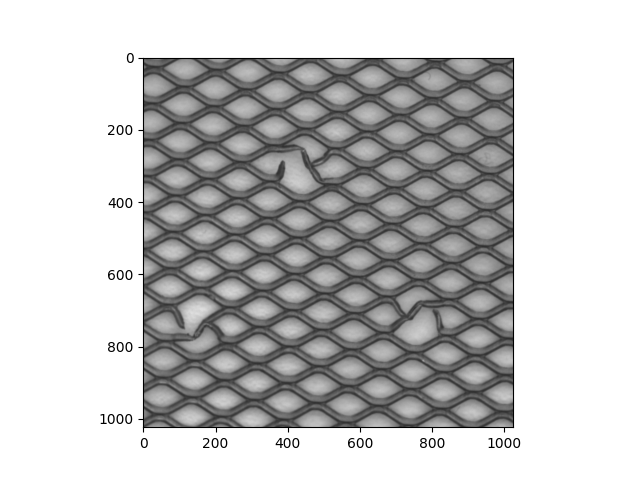

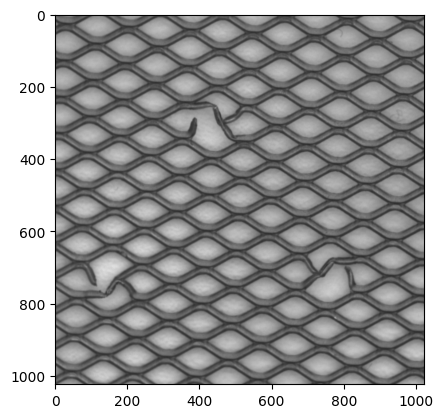

In [ ]:
import PIL

image_path = root_directory / "/Desktop/MVTecAD/anomalib/datasets/grid/test/broken/001.png"
image = read_image(path="/Desktop/MVTecAD/anomalib/datasets/grid/test/broken/001.png")

plt.imshow(image)
plt.savefig('/Desktop/MVTecAD/anomalib/infer_results_grid/image1-grid.png')
PIL.Image.open("/Desktop/MVTecAD/anomalib/infer_results_grid/image1-grid.png")